# Image Classification with CNN for CIFAR_10 Data

<img src="https://miro.medium.com/v2/resize:fit:1400/0*q_G_SgrmgJpExutm.jpg" width=600>

### Problem Definition:

### Given an image, can we predict the correct class of this image?

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(f"x_train shape: {x_train.shape}\ny_train shape: {y_train.shape}\nx_test shape: {x_test.shape}\ny_test shape {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape (10000, 1)


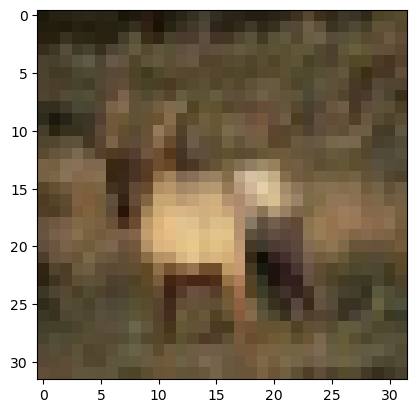

In [4]:
plt.imshow(x_train[3]);

In [5]:
y_train[3]

array([4], dtype=uint8)

### Normalize Data

<img src="https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg" width=600>

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Convolutional Neural Networks---CNNs---Image Classification

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [7]:
#to construct the CNN model layer by layer.
model = Sequential() 
#model expects input images to be of size 32x32 pixels with 3 color channels (e.g., RGB).
model.add(InputLayer(input_shape=(32,32,3))) 
model.add(Reshape(target_shape=(32,32,3))) 
#adds a convolutional layer with 32 filters (or kernels) each of size 3x3 pixels
#ReLU (Rectified Linear Unit), which introduces non-linearity to the model, 
#allowing it to learn more complex patterns in the data. 
model.add(Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding='same')) 
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #taking the maximum value over a 2x2 pooling window.
model.add(Dropout(.20))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu", padding='same')) 
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.20))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu", padding='same')) 
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.20))

#converts the 2D matrix data to a vector
model.add(Flatten())  

#normalizes the activations of the previous layer at each batch, accelerates training and can lead to faster convergence.
model.add(BatchNormalization())
model.add(Dense(120))
model.add(BatchNormalization())
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Dense(60))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Dense(20))
model.add(Dropout(.20))
model.add(Dense(10))

#Crossentropy is suitable for multi-class classification tasks where the labels are integers.
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])


In [13]:
history = model.fit(x_train, y_train, validation_split=.10, epochs=10, batch_size=32)

Epoch 1/10
1407/1407 [==============================] - 43s 28ms/step - loss: 1.3907 - accuracy: 0.4993 - val_loss: 0.9961 - val_accuracy: 0.6526
Epoch 2/10
1407/1407 [==============================] - 41s 29ms/step - loss: 0.9737 - accuracy: 0.6620 - val_loss: 1.0298 - val_accuracy: 0.6532
Epoch 3/10
1407/1407 [==============================] - 41s 29ms/step - loss: 0.8329 - accuracy: 0.7136 - val_loss: 0.6705 - val_accuracy: 0.7704
Epoch 4/10
1407/1407 [==============================] - 40s 28ms/step - loss: 0.7379 - accuracy: 0.7466 - val_loss: 0.6926 - val_accuracy: 0.7654
Epoch 5/10
1407/1407 [==============================] - 40s 29ms/step - loss: 0.6600 - accuracy: 0.7751 - val_loss: 0.8287 - val_accuracy: 0.7186
Epoch 6/10
1407/1407 [==============================] - 43s 30ms/step - loss: 0.6163 - accuracy: 0.7892 - val_loss: 0.5421 - val_accuracy: 0.8126
Epoch 7/10
1407/1407 [==============================] - 41s 29ms/step - loss: 0.5666 - accuracy: 0.8044 - val_loss: 0.6934 -

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 32, 32, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_22 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_23 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)       

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"ACCURACY: % {round(accuracy*100,3)}\nLOSS:  {round(loss,3)}")

313/313 [==============================] - 2s 8ms/step - loss: 0.5421 - accuracy: 0.8183
ACCURACY: % 81.83
LOSS:  0.542


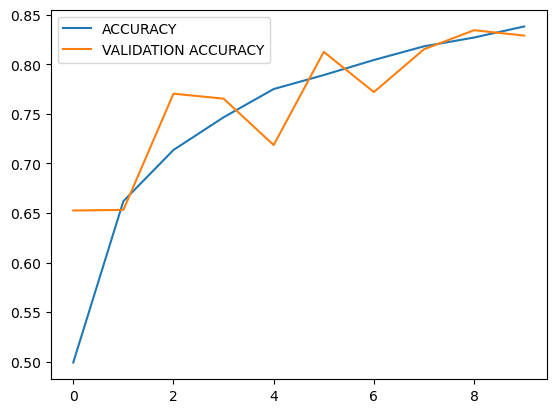

In [16]:
plt.plot(history.history["accuracy"], label="ACCURACY")
plt.plot(history.history["val_accuracy"], label="VALIDATION ACCURACY")
plt.legend();